# 1. КОНТЕКСТ

* Этот набор данных содержит информацию о клиентах компании, выпускающей кредитные карты. Каждая строка представляет клиента, и включены различные характеристики, такие как возраст, зарплата, семейное положение, лимит кредитной карты, категория кредитной карты и т. д. На изображении ниже вы можете найти описание каждого из столбцов, представленных в этом наборе данных:

# 2. ЦЕЛЬ

* Целью этого проекта является сегментация пользователей кредитных карт этой компании путем их группировки на основе их характеристик и потребительского поведения, что позволит компаниям настраивать свои маркетинговые стратегии и оптимизировать предложения продуктов.

# 3. ИМПОРТ БИБЛИОТЕК

In [117]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import ListedColormap
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import numpy as np
from platform import python_version
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import sklearn
import warnings

# 4. ИМПОРТ ДАННЫХ

In [118]:
df = pd.read_csv('BankChurners.csv')

In [119]:
df.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

# 5. ОЧИСТКА ДАННЫХ

In [121]:
df.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

* пропусков нет, это хорошо

In [122]:
df = df.rename(columns={
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1': 'Naive_Bayes_Prob_Existing_Customer',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2': 'Naive_Bayes_Prob_Attrited_Customer'
})

* Изменили названия признаков, их названия слишком длинные.

In [123]:
# checking for duplicated values
df.duplicated().sum()

0

* Нет дублирующихся названий.

In [124]:
# Df Describe 
with pd.option_context(
    "display.float_format",
    "{:.2f}".format,
    "display.max_columns",
    None,
):
    display(df.describe())

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Prob_Existing_Customer,Naive_Bayes_Prob_Attrited_Customer
count,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00
mean,739177606.33,46.33,2.35,35.93,3.81,2.34,2.46,8631.95,1162.81,7469.14,0.76,4404.09,64.86,0.71,0.27,0.16,0.84
std,36903783.45,8.02,1.30,7.99,1.55,1.01,1.11,9088.78,814.99,9090.69,0.22,3397.13,23.47,0.24,0.28,0.37,0.37
min,708082083.00,26.00,0.00,13.00,1.00,0.00,0.00,1438.30,0.00,3.00,0.00,510.00,10.00,0.00,0.00,0.00,0.00
25%,713036770.50,41.00,1.00,31.00,3.00,2.00,2.00,2555.00,359.00,1324.50,0.63,2155.50,45.00,0.58,0.02,0.00,1.00
50%,717926358.00,46.00,2.00,36.00,4.00,2.00,2.00,4549.00,1276.00,3474.00,0.74,3899.00,67.00,0.70,0.18,0.00,1.00
75%,773143533.00,52.00,3.00,40.00,5.00,3.00,3.00,11067.50,1784.00,9859.00,0.86,4741.00,81.00,0.82,0.50,0.00,1.00
max,828343083.00,73.00,5.00,56.00,6.00,6.00,6.00,34516.00,2517.00,34516.00,3.40,18484.00,139.00,3.71,1.00,1.00,1.00


**Посмотрим на некоторые интересные моменты.**

* Customer_Age: Средний возраст клиента ~46 лет, диапазон от 26 до 73.
* Dependent_count: В среднем 2.35 иждивенца, от 0 до 5.
* Months_on_book: Средний срок владения картой ~36 месяцев (3 года), от 13 до 56 месяцев.
* Total_Relationship_Count: В среднем 3.81 продукта у клиента, от 1 до 6.
* Months_Inactive_12_mon: В среднем 2.34 месяца неактивности за последние 12 месяцев.
* Contacts_Count_12_mon: В среднем 2.46 контакта со службой поддержки за последние 12 месяцев.
* Credit_Limit: Средний кредитный лимит ~8632, диапазон от 1438 до 34516.
* Total_Revolving_Bal: Средний остаток на кредитной карте ~1163, диапазон от 0 до 2517.
* Avg_Open_To_Buy: Средний доступный кредит ~7469, диапазон от 3 до 34516.
* Total_Amt_Chng_Q4_Q1: Изменение суммы транзакций между Q4 и Q1, в среднем 0.76.
* Total_Trans_Amt: Общая сумма транзакций ~4404.
* Total_Trans_Ct: Общее количество транзакций ~65.
* Total_Ct_Chng_Q4_Q1: Изменение количества транзакций между Q4 и Q1, в среднем 0.71.
* Avg_Utilization_Ratio: Средний коэффициент использования кредитной карты ~0.27 (27%).
* Naive_Bayes_Prob_Existing_Customer: Средняя вероятность того, что клиент останется, составляет 0.16.
* Naive_Bayes_Prob_Attrited_Customer: Средняя вероятность того, что клиент уйдет, составляет 0.84.


In [125]:
# Dropping "CLIENTNUM" column
df = df.drop(columns=['CLIENTNUM'])

* Исключили столбец CLIENTNUM, он не информативен.

# 6. EDA

Sweetviz:

* Особенности:
     * Генерация интерактивных HTML-отчетов с визуализациями.
     * Сравнение двух наборов данных (например, обучающего и тестового).
     * Акцент на визуализации и интерпретацию данных.
* Преимущества:
     * Простота использования.
     * Привлекательные и информативные визуализации.
     * Возможность сравнения наборов данных.

In [126]:
#import sweetviz as sv
#report = sv.analyze(df)
#report.show_html('sweetviz_report.html')

Из отчета Sweetviz:

Общая картина, предположение о том, что зарплата напрямую влияет на категорию кредитной карты, вполне логично и обоснованно. В целом, банки при принятии решения о выдаче кредитной карты и определении ее категории учитывают финансовое состояние клиента, в том числе его доход.

Вот как это обычно работает:

* Доход как фактор риска: Банки рассматривают доход как один из ключевых факторов риска при выдаче кредитных карт. Более высокий доход указывает на большую платежеспособность клиента и, следовательно, на меньший риск невозврата долга.
* Категория карты и преимущества: Более престижные категории карт (Silver, Gold, Platinum) обычно предоставляют клиентам дополнительные преимущества, такие как:
     * Более высокий кредитный лимит.
     * Более низкие процентные ставки.
     * Программы лояльности с повышенными бонусами и скидками.
     * Страхование и другие привилегии.
* Соответствие требованиям: Чтобы получить карту более высокой категории, клиенты должны соответствовать определенным требованиям, в том числе по уровню дохода. Банки устанавливают минимальные пороги дохода для каждой категории карт.

## Cоздадим общую функцию для визуализации категориальных признаков.

In [127]:
import math

In [128]:
def plot_categorical_features_in_one(df, color, cols_per_row=2, figsize=(16, 10)):
    """
    Визуализирует категориальные признаки в одном изображении, используя субплоты.

    Args:
        df (pd.DataFrame): DataFrame с данными.
        color (str): Цвет для столбчатых диаграмм.
        cols_per_row (int): Количество столбцов в сетке субплотов.
        figsize (tuple): Размер фигуры (ширина, высота).
    """

    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    num_plots = len(categorical_cols)
    rows = math.ceil(num_plots / cols_per_row)  # Вычисляем количество строк
    fig, axes = plt.subplots(rows, cols_per_row, figsize=figsize)
    axes = axes.flatten()  # Преобразуем массив осей в одномерный для удобства итерации
    fig.tight_layout(pad=5.0)  # Add padding for spacing

    for i, col in enumerate(categorical_cols):
        ax = axes[i]
        df[col].value_counts().plot(kind='bar', color=color, ax=ax)
        ax.set_title(f'Distribution of {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Count')

        # Stacked bar plot (влияние на Attrition_Flag) - separate plot
        if 'Attrition_Flag' in df.columns and col != 'Attrition_Flag':
            cross_tab = pd.crosstab(df[col], df['Attrition_Flag'])
            cross_tab.plot(kind='bar', stacked=True, ax=ax, alpha=0.5, legend=True) # Transparent for better visibility
            ax.legend() # Show Legend

    # Hide any unused subplots
    for i in range(num_plots, rows * cols_per_row):
        fig.delaxes(axes[i])

    plt.suptitle('Categorical Features Distribution and Attrition (Stacked)', fontsize=16)
    plt.show()
    
# Задаем цвет
color2 = 'skyblue'

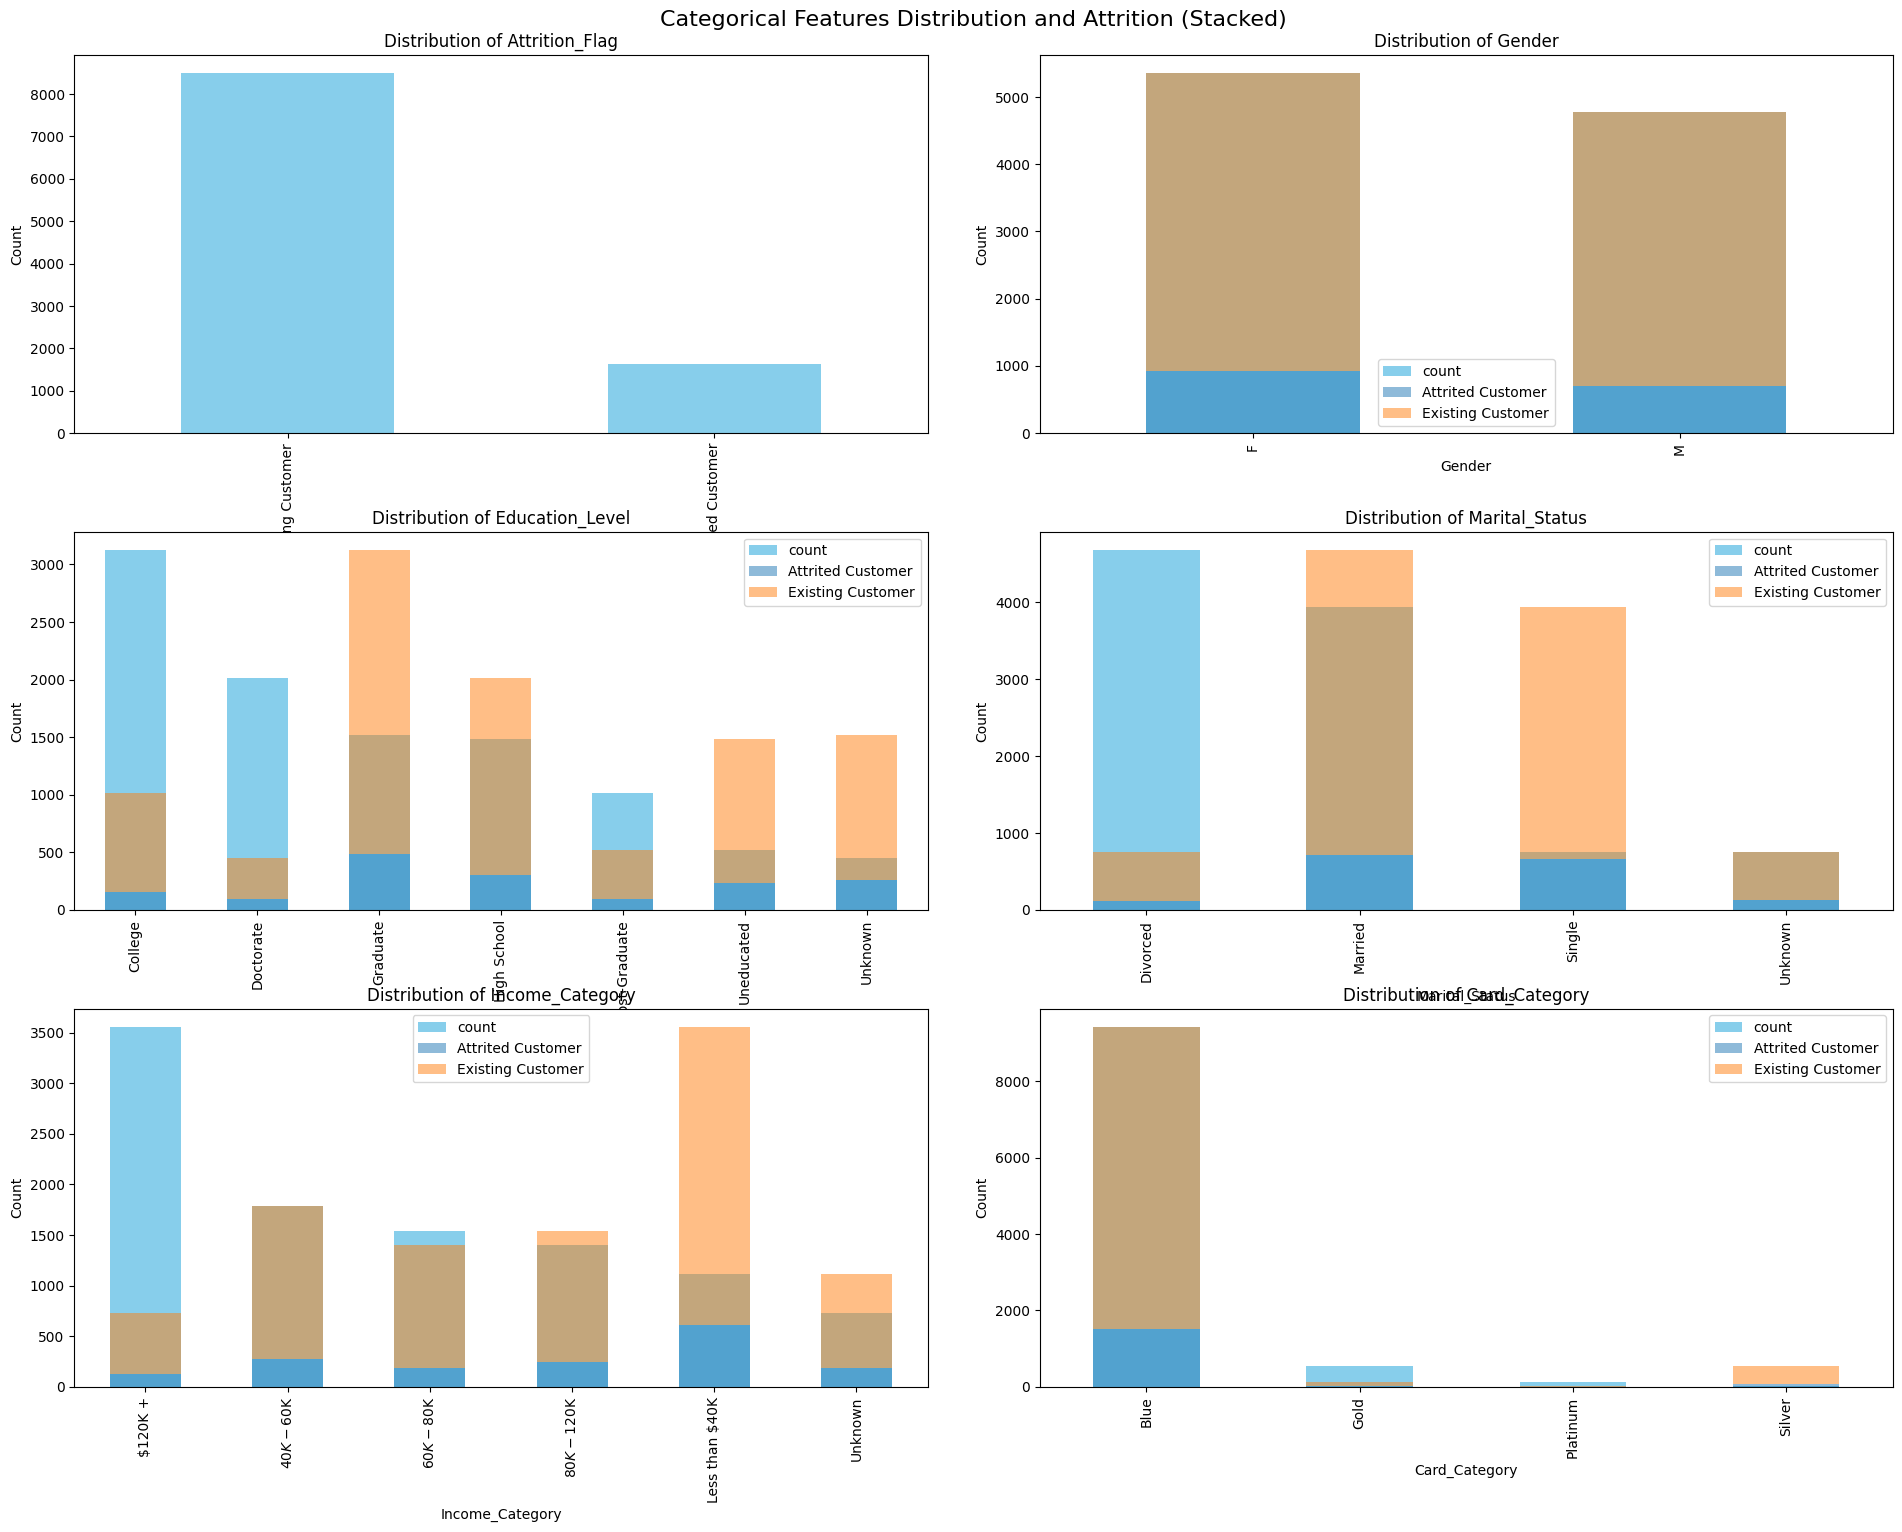

In [129]:
# Вызываем функцию
plot_categorical_features_in_one(df, color2, cols_per_row=2, figsize=(20, 15))

Выводы:

* Дисбаланс классов: Подтверждается необходимость учета дисбаланса классов при обучении модели.

Влияние признаков:
* Признаки Education_Level, Marital_Status и Income_Category могут быть полезны для предсказания оттока клиентов, так как распределение “Attrited Customer” немного отличается в зависимости от значений этих признаков.
* Признак Card_Category может быть менее полезным, так как доля “Attrited Customer” существенно не меняется в зависимости от категории карты (за исключением “Silver”, но там мало данных).
* Признак Gender кажется малоинформативным.

Давайте применим выбранную стратегию обработки “Unknown” значений к столбцам Education_Level, Marital_Status и Income_Category.

In [130]:
# Checking values of Income_Category 
df['Income_Category'].value_counts()

Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64

In [131]:
# Drop values "Unknown."
df = df.drop(df[df['Income_Category'] == 'Unknown'].index)

In [132]:
def plot_bar_pie(df, feature, color_palette):
    """
    Рисует столбчатую диаграмму и круговую диаграмму для категориального признака.

    Args:
        df (pd.DataFrame): DataFrame с данными.
        feature (str): Название категориального признака.
        color_palette (list): Список цветов для диаграмм.
    """
    values = df[feature].value_counts()
    labels = values.index
    # Bar Plot
    plt.figure(figsize=(16, 6))
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
    values.plot(kind='bar', color=color_palette)
    plt.title(f'Distribution of {feature} (Bar Plot)')
    plt.xlabel(feature)
    plt.ylabel('Count')

    # Pie Chart
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
    plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=color_palette)
    plt.title(f'Distribution of {feature} (Pie Chart)')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

# Example color palette (replace with your actual color palette)
color_palette_cat = sns.color_palette("pastel")  # Or your custom list of colors

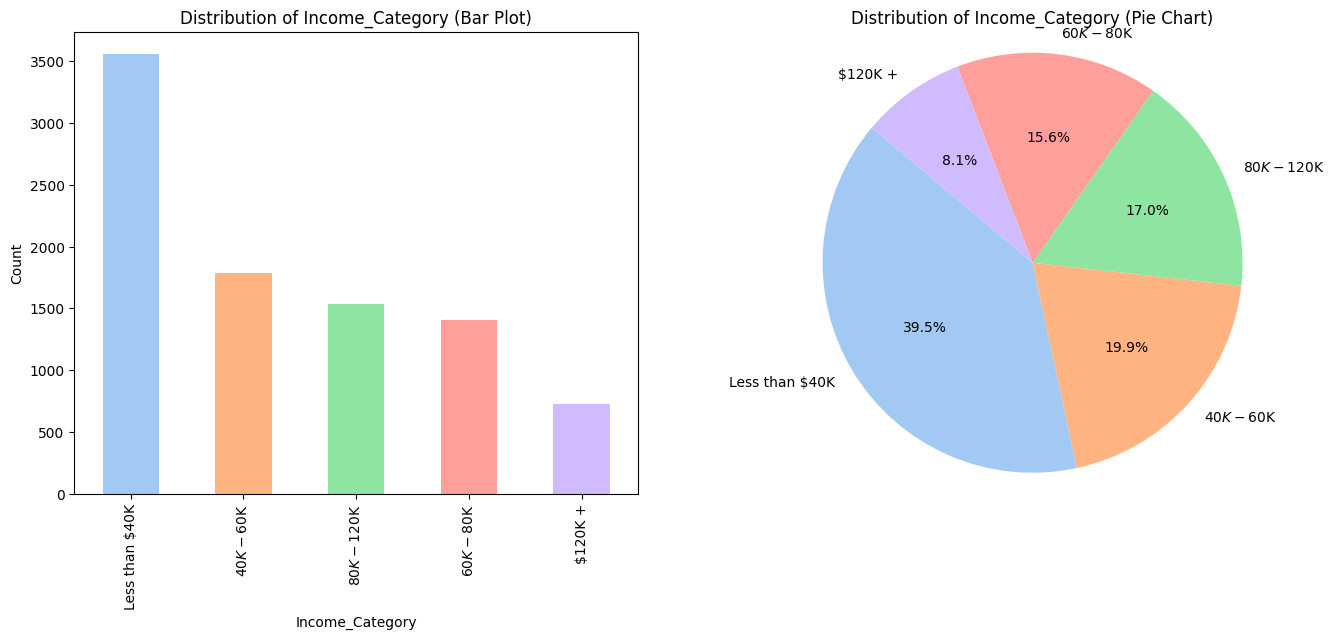

In [133]:
# Построение графика
plot_bar_pie(df, 'Income_Category', color_palette_cat)

## Marital_Status

Сделаем ерекодировку с сохранением категорий, но с другим смыслом:

Вместо бинарного признака, можно перекодировать существующий столбец Marital_Status с новой логикой. Например, можно создать три категории:

* “Has Partner”: Married
* “No Partner”: Single, Divorced
* “Unknown”: Unknown.
Этот подход сохраняет больше информации, чем просто бинарный признак, но все равно упрощает исходные категории.

In [134]:
#Check Marital_Status values
df['Marital_Status'].value_counts()

Marital_Status
Married     4194
Single      3499
Unknown      667
Divorced     655
Name: count, dtype: int64

In [135]:
# Перекодировка Marital_Status
def recode_marital_status(status):
    if status == 'Married':
        return 'Has Partner'
    elif status == 'Unknown':
        return 'Unknown'
    else:
        return 'No Partner'

df['Marital_Status'] = df['Marital_Status'].apply(recode_marital_status)

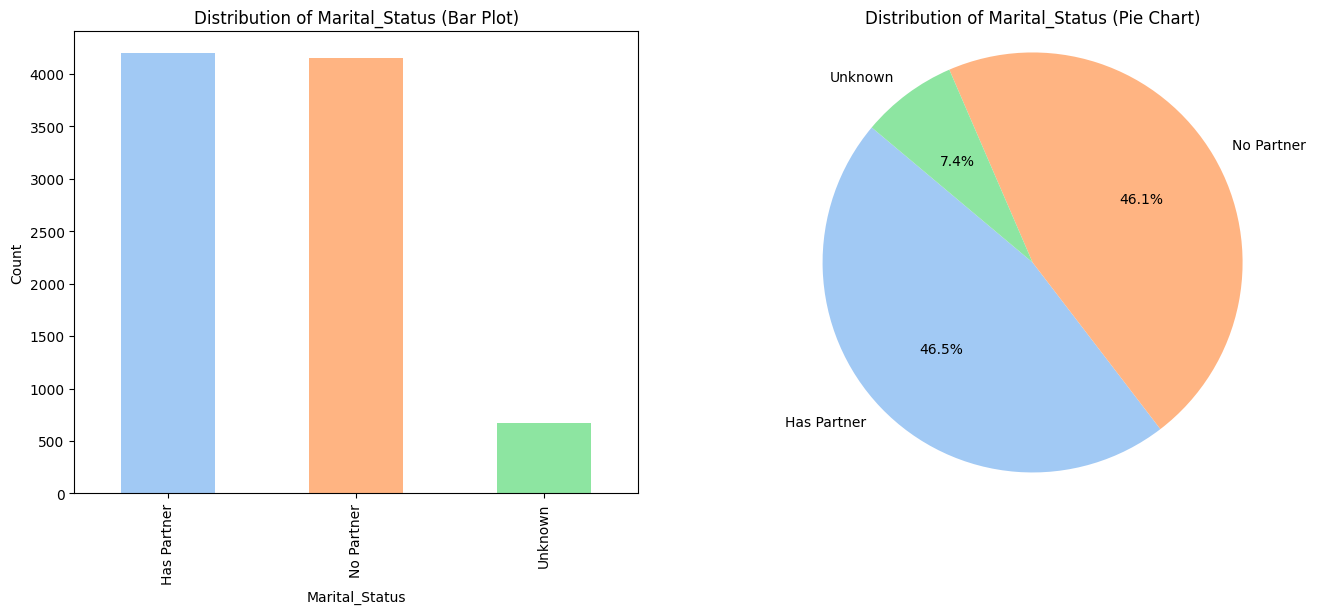

In [136]:
# Bar and pie plot Marital_Status
plot_bar_pie(df, 'Marital_Status', color_palette_cat)

## Education_Level

Группировка категорий:
*  разделим признак Education_Level на две категории: "Среднее образование" и "Высшее образование", чтобы упростить анализ.

In [137]:
#Check Card_Category values
df['Education_Level'].value_counts()

Education_Level
Graduate         2796
High School      1788
Unknown          1374
Uneducated       1302
College           905
Post-Graduate     469
Doctorate         381
Name: count, dtype: int64

In [138]:
# Словарь для перекодировки
education_binary_map = {
    'High School': 'Average',
    'Uneducated': 'Average',
    'Unknown': 'Average',
    'Graduate': 'Higher',
    'College': 'Higher',
    'Post-Graduate': 'Higher',
    'Doctorate': 'Higher'
}

# Применяем группировку
df['Education_Level'] = df['Education_Level'].map(education_binary_map)

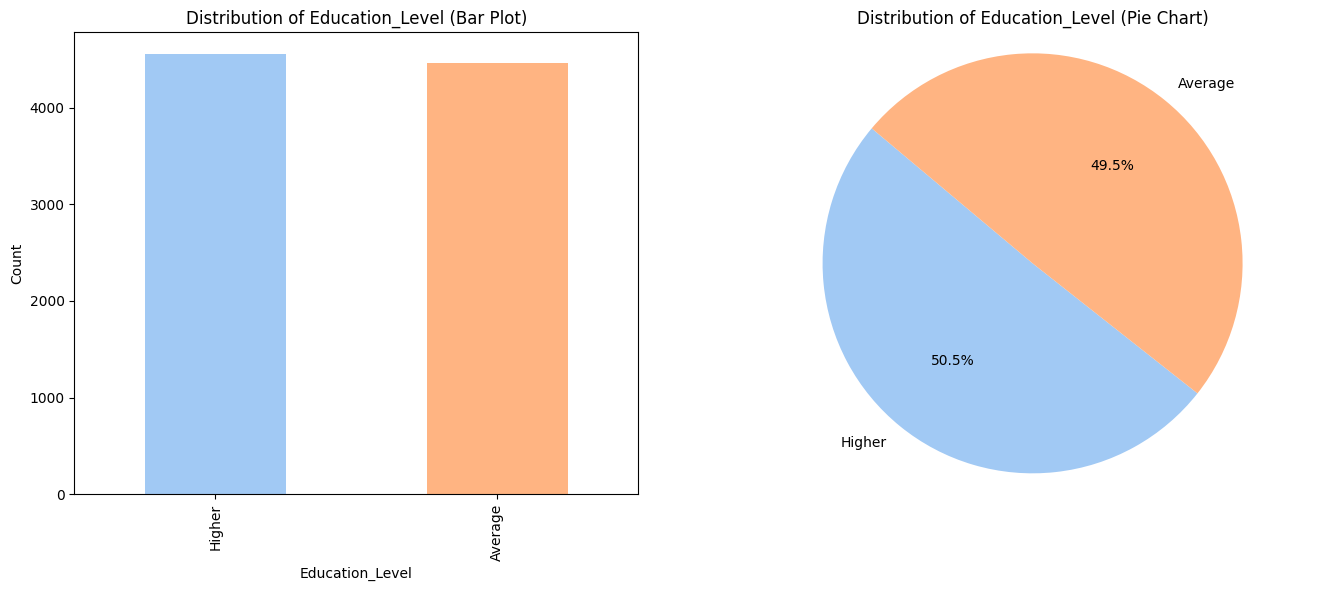

In [139]:
# Bar and pie plot Card_Category
plot_bar_pie(df, 'Education_Level', color_palette_cat)

### Numerical Columns

In [140]:
def plot_numerical_features_in_one(df, color, cols_per_row=4, figsize=(16, 8)):  # Adjusted figsize and cols_per_row
    """
    Визуализирует числовые признаки в одном изображении, используя субплоты.

    Args:
        df (pd.DataFrame): DataFrame с данными.
        color (str): Цвет для графиков.
        cols_per_row (int): Количество столбцов в сетке субплотов.
        figsize (tuple): Размер фигуры (ширина, высота).
    """

    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    num_plots = len(numerical_cols) * 2  # 2 графика на признак (гистограмма и boxplot)
    rows = math.ceil(num_plots / cols_per_row)
    fig, axes = plt.subplots(rows, cols_per_row, figsize=figsize)
    axes = axes.flatten()
    #fig.tight_layout(pad=5.0)  # Removed tight_layout

    for i, col in enumerate(numerical_cols):
        # Histogram
        sns.histplot(df[col], kde=True, color=color, ax=axes[i*2])
        axes[i*2].set_title(f'Distribution of {col} (Histogram)', fontsize=10) # Smaller title
        axes[i*2].set_xlabel(col, fontsize=8) # Smaller label
        axes[i*2].set_ylabel('Frequency', fontsize=8) # Smaller label

        # Boxplot
        sns.boxplot(x=df[col], color=color, ax=axes[i*2+1])
        axes[i*2+1].set_title(f'Distribution of {col} (Boxplot)', fontsize=10) # Smaller title
        axes[i*2+1].set_xlabel(col, fontsize=8) # Smaller label

    # Hide any unused subplots
    for i in range(num_plots, rows * cols_per_row):
        fig.delaxes(axes[i])

    #plt.suptitle('Numerical Features Distribution (Histograms and Boxplots)', fontsize=16)  # Removed suptitle
    plt.show()

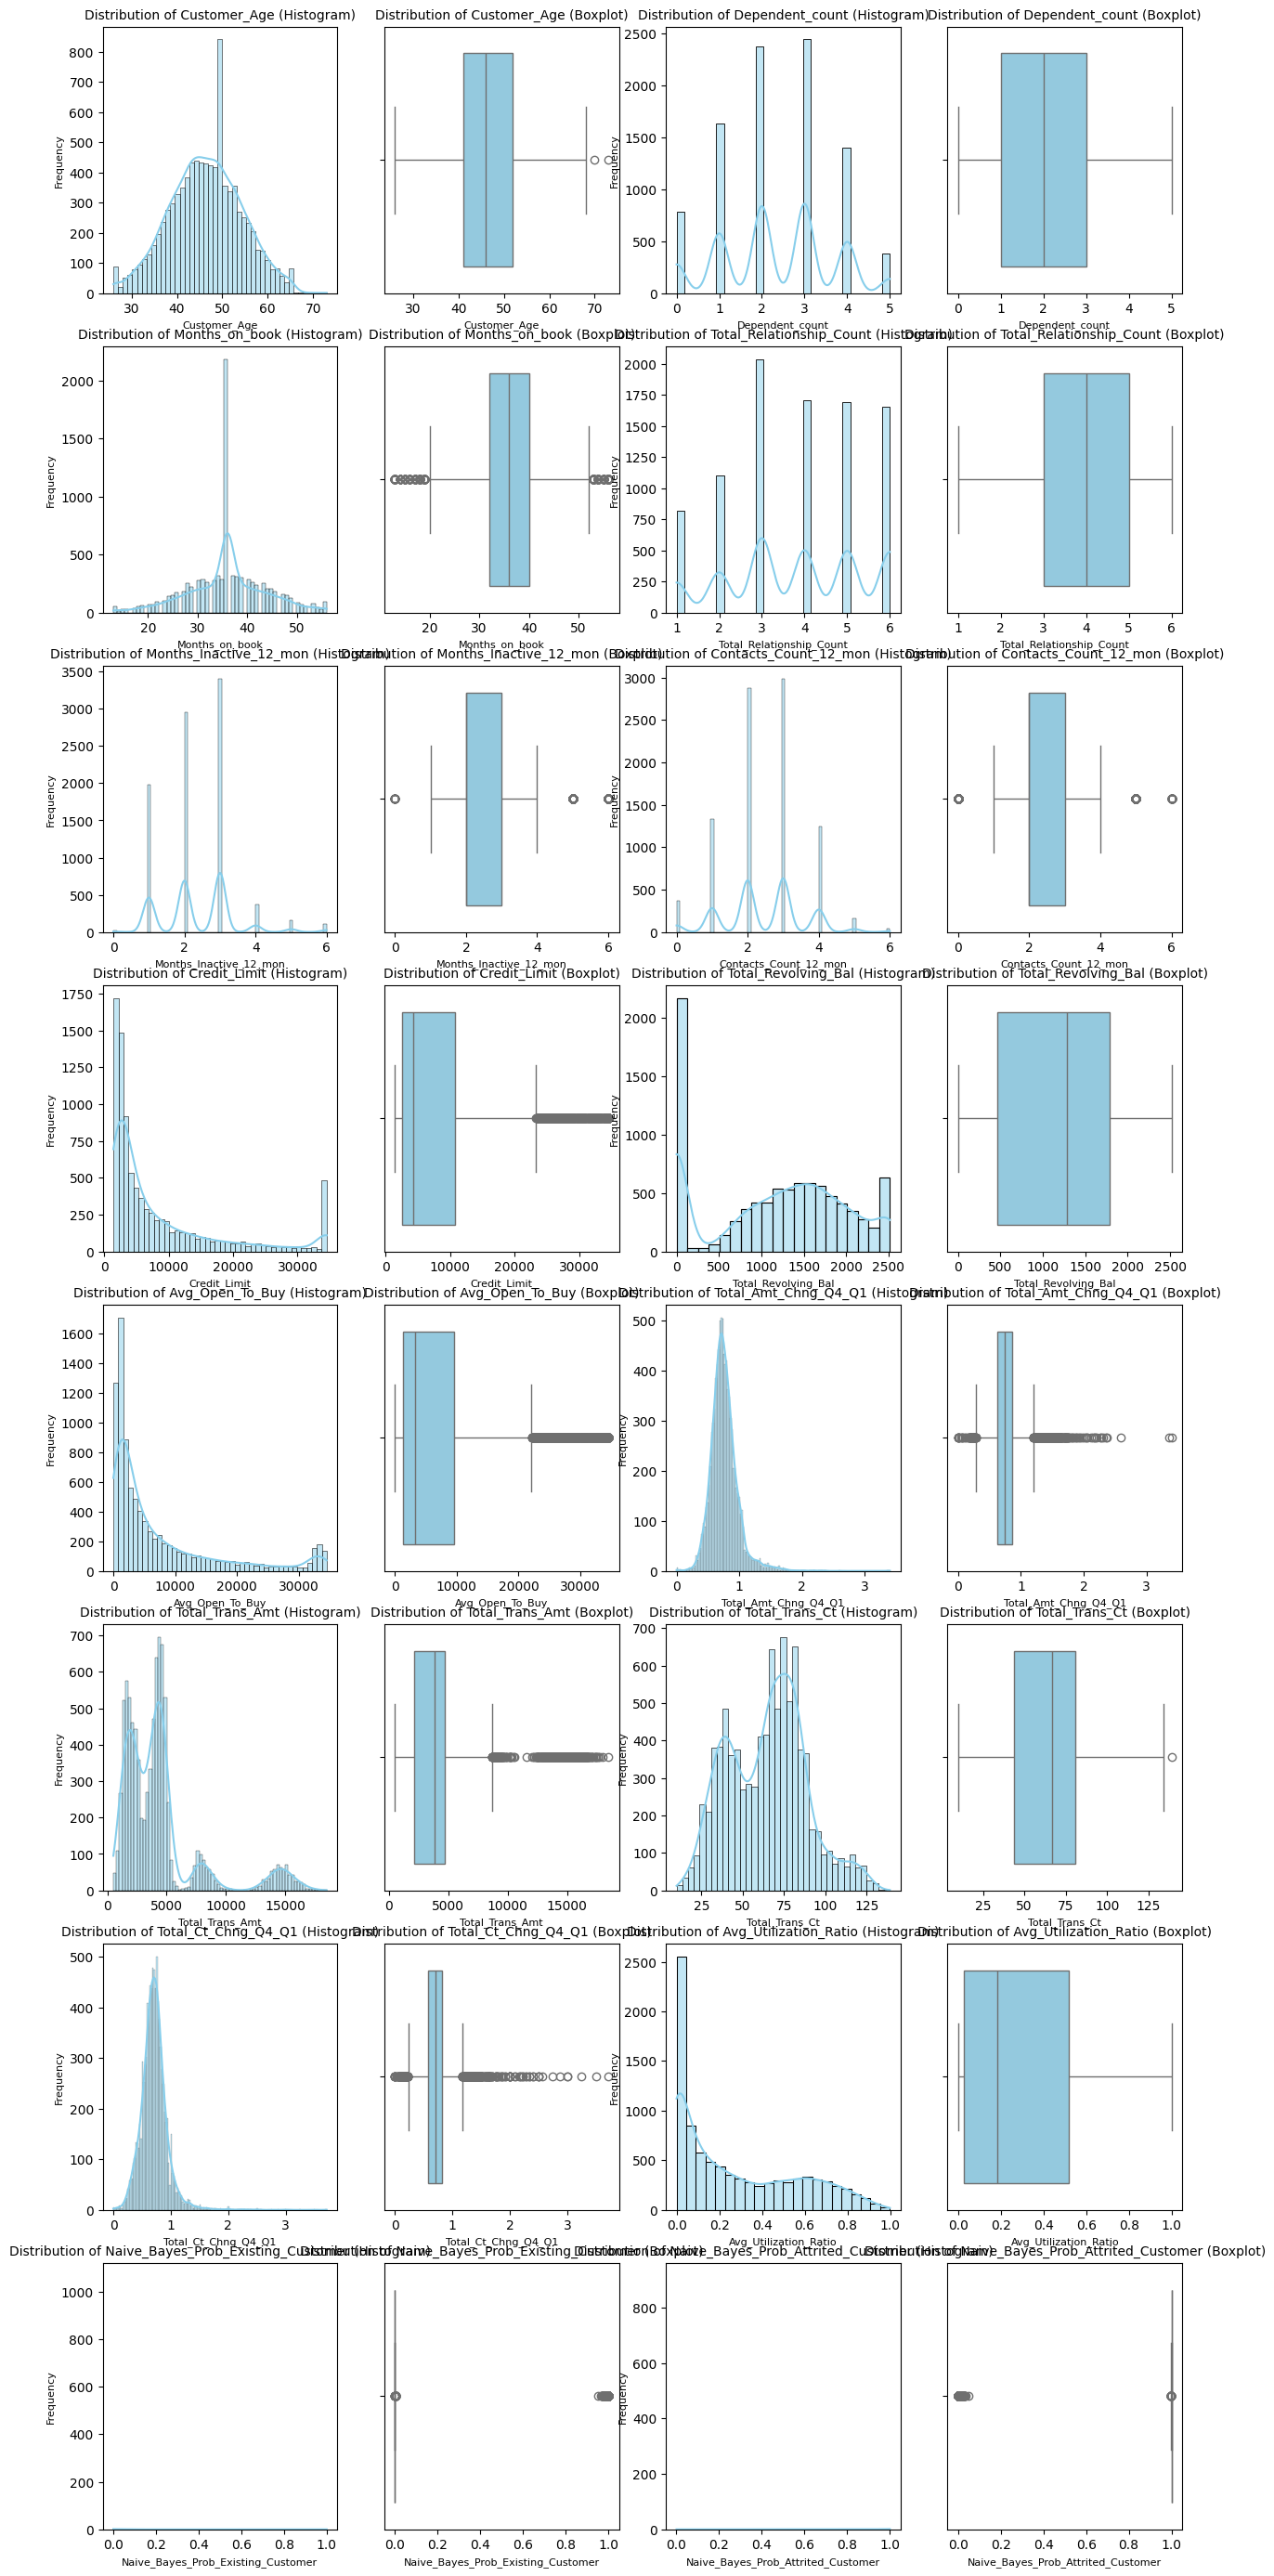

In [141]:
# Вызываем функцию
plot_numerical_features_in_one(df, color2, cols_per_row=4, figsize=(15, 35))

* Total_Amt_Chng_Q4_Q1: Распределение сосредоточено около 1, но есть выбросы.
* Total_Ct_Chng_Q4_Q1: Распределение скошено вправо, есть выбросы.
* Naive_Bayes_Prob_Existing_Customer и Naive_Bayes_Prob_Attrited_Customer: Очень узкие распределения. Это предсказанные вероятности, выданные моделью Naive Bayes, которая, вероятно, уже использовалась для этих данных. Распределения показывают, что модель очень уверена в своих прогнозах.

### Начнем с обработки выбросов в столбцах Total_Amt_Chng_Q4_Q1 и Total_Ct_Chng_Q4_Q1

In [142]:
def handle_outliers_iqr(df, column, lower_multiplier=1.5, upper_multiplier=1.5):
    """
    Обрабатывает выбросы в столбце DataFrame, заменяя их на границы IQR.

    Args:
        df (pd.DataFrame): DataFrame с данными.
        column (str): Название столбца для обработки.
        lower_multiplier (float): Множитель IQR для нижней границы (default: 1.5).
        upper_multiplier (float): Множитель IQR для верхней границы (default: 1.5).
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - lower_multiplier * IQR
    upper_bound = Q3 + upper_multiplier * IQR

    # Winsorize the data - Cap outliers
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

In [143]:
# Обработка выбросов
handle_outliers_iqr(df, 'Total_Amt_Chng_Q4_Q1')
handle_outliers_iqr(df, 'Total_Ct_Chng_Q4_Q1')

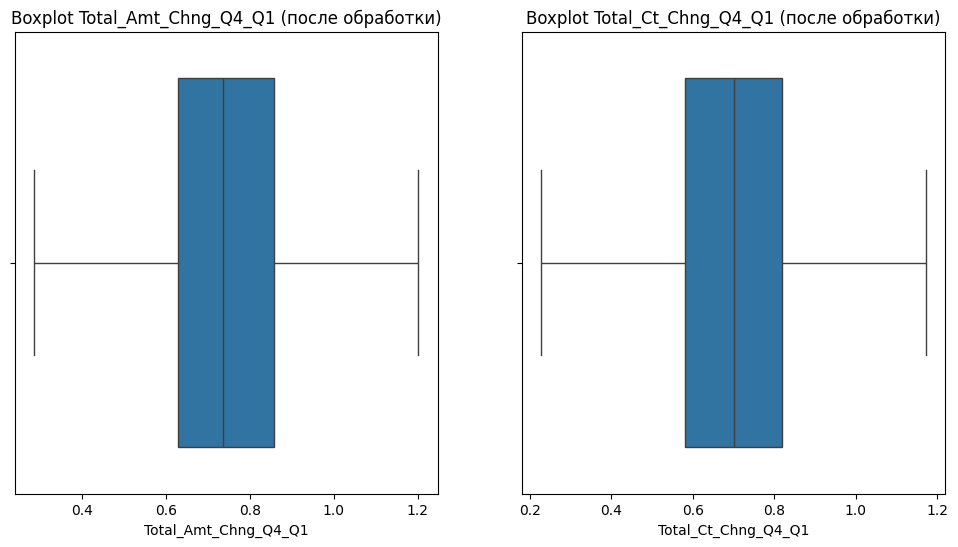

In [144]:
# Проверка результатов
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Total_Amt_Chng_Q4_Q1'])
plt.title('Boxplot Total_Amt_Chng_Q4_Q1 (после обработки)')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Total_Ct_Chng_Q4_Q1'])
plt.title('Boxplot Total_Ct_Chng_Q4_Q1 (после обработки)')

plt.show()

Учитывая, что признаки Naive_Bayes_Prob_Existing_Customer и Naive_Bayes_Prob_Attrited_Customer являются предсказаниями другой модели, нужно быть очень осторожными при их использовании. Они могут привести к переобучению или утечке данных (data leakage). Возможно, стоит их вообще исключить.

In [145]:
# Исключение признаков
df = df.drop(['Naive_Bayes_Prob_Existing_Customer', 'Naive_Bayes_Prob_Attrited_Customer'], axis=1)

### Корреляция между объектами

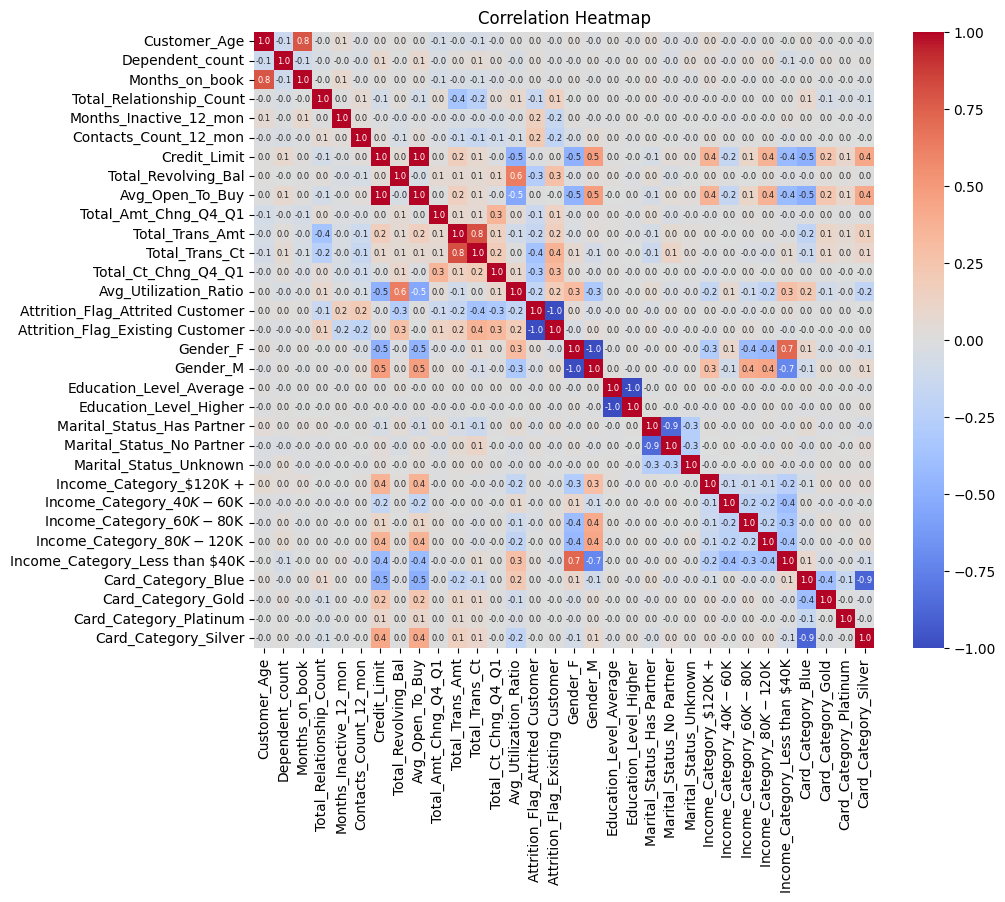

In [146]:
df_dummies = pd.get_dummies(df)

# Plot Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_dummies.corr(), annot=True, cmap="coolwarm", fmt=".1f", annot_kws={"size": 6})
plt.title("Correlation Heatmap")
plt.show()

* Мультиколлинеарность: Наличие высокой корреляции между некоторыми признаками (например, Credit_Limit и Avg_Open_To_Buy) может привести к проблемам с мультиколлинеарностью, что может ухудшить интерпретируемость и стабильность модели.

In [147]:
# Исключение признака
df = df.drop(['Avg_Open_To_Buy'], axis=1)

# 7. ПРЕДВАРИТЕЛЬНАЯ ОБРАБОТКА ДАННЫХ

In [148]:
one_hot_cols = [
    "Gender", 
    "Education_Level", 
    "Marital_Status",
    "Income_Category",
    "Card_Category",
    "Dependent_count",
    "Total_Relationship_Count",
    "Months_Inactive_12_mon",
    "Contacts_Count_12_mon",
    "Attrition_Flag",
]

standard_cols = [
    "Customer_Age", 
    "Total_Amt_Chng_Q4_Q1",
    "Total_Ct_Chng_Q4_Q1",
    "Months_on_book"
]

power_cols = [
    "Total_Revolving_Bal",
    "Credit_Limit",
    "Avg_Utilization_Ratio",
]

minmax_cols = [
    "Total_Trans_Amt",
    "Total_Trans_Ct",
    "Total_Revolving_Bal",
]

In [149]:
from sklearn.preprocessing import (
    OneHotEncoder,
    StandardScaler,
    MinMaxScaler,
    PowerTransformer,
)
from sklearn.compose import ColumnTransformer

preprocessing = ColumnTransformer(
    [
        ("one-hot", OneHotEncoder(), one_hot_cols),
        ("standard", StandardScaler(), standard_cols),
        ("minmax", MinMaxScaler(), minmax_cols),
        ("power", PowerTransformer(), power_cols),
    ]
)

preprocessing.fit_transform(df)

array([[ 0.        ,  1.        ,  1.        , ..., -0.0188401 ,
         0.9866723 , -0.7875768 ],
       [ 1.        ,  0.        ,  0.        , ...,  0.06214426,
         0.59928897, -0.52422123],
       [ 0.        ,  1.        ,  0.        , ..., -1.6789404 ,
        -0.37953846, -1.20649748],
       ...,
       [ 1.        ,  0.        ,  1.        , ..., -1.6789404 ,
         0.163654  , -1.20649748],
       [ 0.        ,  1.        ,  0.        , ..., -1.6789404 ,
         0.13720785, -1.20649748],
       [ 1.        ,  0.        ,  0.        , ...,  0.82679964,
         0.81275693, -0.09422051]])

In [150]:
df_scaled = pd.DataFrame(
    preprocessing.fit_transform(df),
    columns=preprocessing.get_feature_names_out()
)

df_scaled.head()

,one-hot__Gender_F,one-hot__Gender_M,one-hot__Education_Level_Average,one-hot__Education_Level_Higher,one-hot__Marital_Status_Has Partner,one-hot__Marital_Status_No Partner,one-hot__Marital_Status_Unknown,one-hot__Income_Category_$120K +,one-hot__Income_Category_$40K - $60K,one-hot__Income_Category_$60K - $80K,...,standard__Customer_Age,standard__Total_Amt_Chng_Q4_Q1,standard__Total_Ct_Chng_Q4_Q1,standard__Months_on_book,minmax__Total_Trans_Amt,minmax__Total_Trans_Ct,minmax__Total_Revolving_Bal,power__Total_Revolving_Bal,power__Credit_Limit,power__Avg_Utilization_Ratio
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.167938,2.430427,2.378575,0.384946,0.035273,0.248062,0.308701,-0.018840,0.986672,-0.787577
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.336254,2.430427,2.378575,1.015999,0.043452,0.178295,0.343266,0.062144,0.599289,-0.524221
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.588351,2.430427,2.378575,0.006314,0.076611,0.077519,0.000000,-1.678940,-0.379538,-1.206497
3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.798179,2.430427,2.378575,-0.246107,0.036775,0.077519,1.000000,1.117498,-0.419383,1.466399
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.798179,2.430427,2.378575,-1.886846,0.017025,0.139535,0.000000,-1.678940,0.009527,-1.206497


In [151]:
# Filtering only numeric columns for comparison.
scaled_columns_not_one_hot = df_scaled.columns[~df_scaled.columns.str.startswith("one")]
scaled_columns_not_one_hot

Index(['standard__Customer_Age', 'standard__Total_Amt_Chng_Q4_Q1',
       'standard__Total_Ct_Chng_Q4_Q1', 'standard__Months_on_book',
       'minmax__Total_Trans_Amt', 'minmax__Total_Trans_Ct',
       'minmax__Total_Revolving_Bal', 'power__Total_Revolving_Bal',
       'power__Credit_Limit', 'power__Avg_Utilization_Ratio'],
      dtype='object')

In [152]:
# Selecting features
data_to_plot = df_scaled[scaled_columns_not_one_hot]

In [153]:
def plot_numerical_hist_in_one(df, cols_per_row=3, figsize=(15, 10)):
    """
    Строит гистограммы для всех числовых столбцов в DataFrame в одной фигуре, используя субплоты.

    Args:
        df (pd.DataFrame): DataFrame с числовыми столбцами.
        cols_per_row (int): Количество столбцов в сетке субплотов.
        figsize (tuple): Размер фигуры (ширина, высота).
    """
    numerical_cols = df.select_dtypes(include=['number']).columns  # Get numerical columns

    num_plots = len(numerical_cols)
    rows = math.ceil(num_plots / cols_per_row)
    fig, axes = plt.subplots(rows, cols_per_row, figsize=figsize)
    axes = axes.flatten()  # Flatten the axes array for easy indexing

    for i, column in enumerate(numerical_cols):
        axes[i].hist(df[column], bins=30)  # You can adjust the number of bins
        axes[i].set_title(f'Distribution of {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frequency')

    # Hide any unused subplots
    for i in range(num_plots, rows * cols_per_row):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

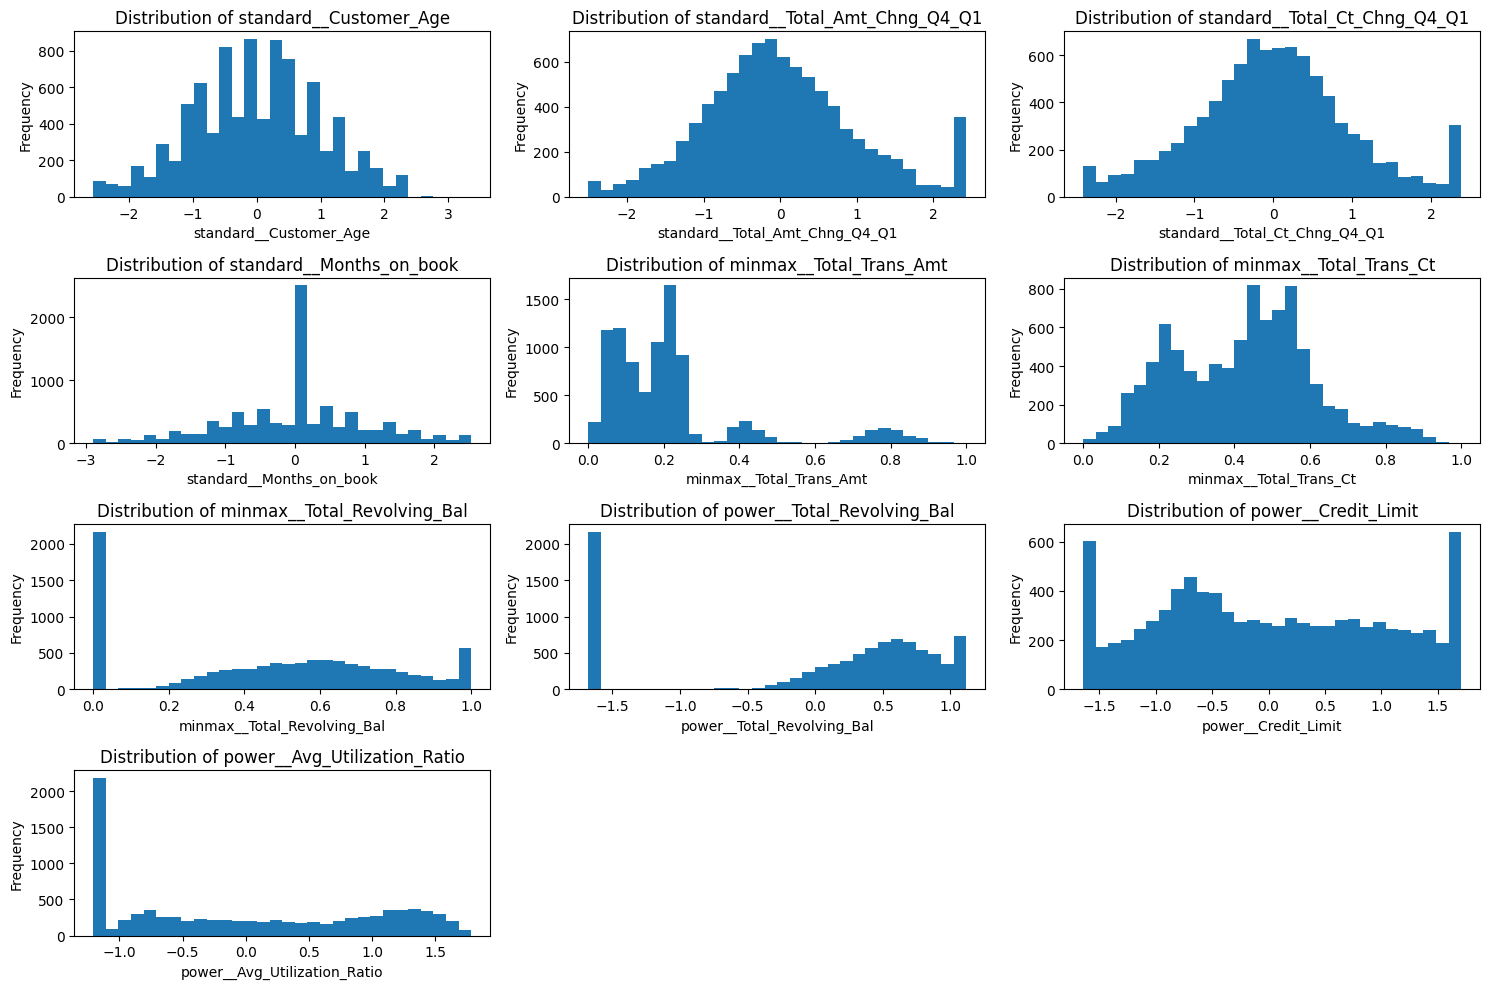

In [154]:
# Plot histograms
plot_numerical_hist_in_one(data_to_plot)

# 8. ОПРЕДЕЛЕНИЕ КОЛИЧЕСТВА КЛАСТЕРОВ

In [155]:
def plot_elbow_silhouette(df, max_clusters=10):
    """
    Строит графики метода локтя и силуэта для определения оптимального количества кластеров.

    Args:
        df (pd.DataFrame): DataFrame с данными для кластеризации.
        max_clusters (int): Максимальное количество кластеров для проверки.
    """
    wcss = []
    silhouette_scores = []

    for i in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, n_init = 'auto', random_state=42)
        kmeans.fit(df)
        wcss.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(df, kmeans.labels_))

    # Метод локтя
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(range(2, max_clusters + 1), wcss, marker='o')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')

    # Метод силуэта
    plt.subplot(1, 2, 2)
    plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
    plt.title('Silhouette Method for Optimal k')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')

    plt.tight_layout()
    plt.show()

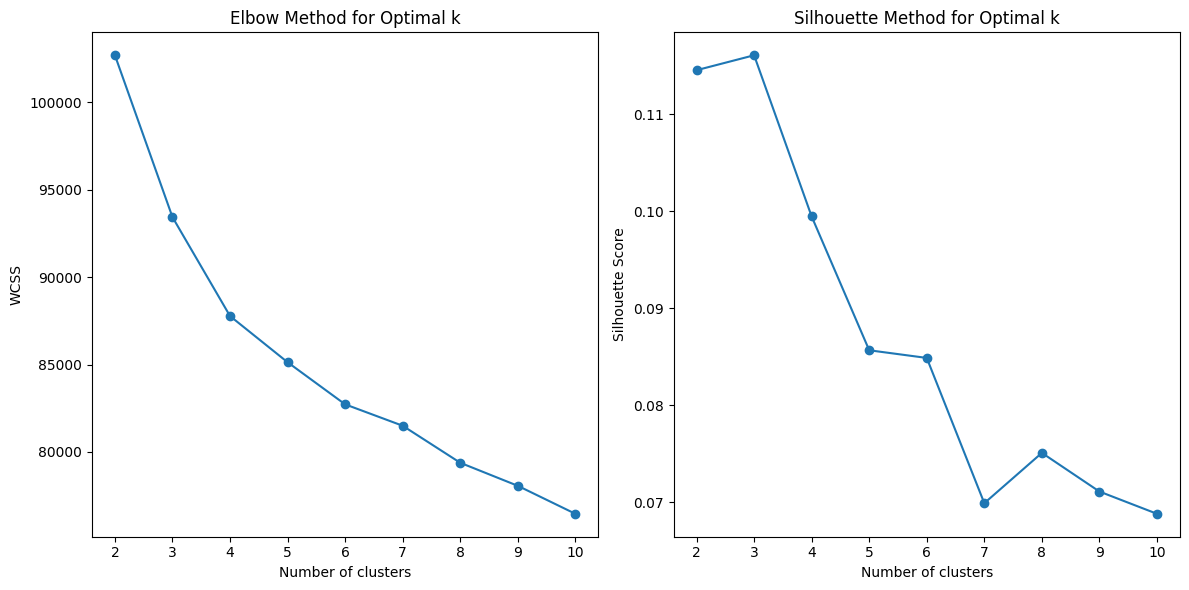

In [156]:
# Определение оптимального количества кластеров
plot_elbow_silhouette(df_scaled)

Учитывая результаты обоих методов, я бы рассмотрел 3 кластера как наиболее вероятный вариант оптимального количества кластеров.

# 9. PCA

In [157]:
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

RANDOM_STATE = 42

pipeline = Pipeline(
    [
        ("preprocessing", preprocessing),
        ("pca", PCA(n_components=2, random_state=RANDOM_STATE)),
        ("clustering", KMeans(n_clusters=3, random_state=RANDOM_STATE, n_init=10))
    ]
)

pipeline.fit(df)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('one-hot', OneHotEncoder(),
                                                  ['Gender', 'Education_Level',
                                                   'Marital_Status',
                                                   'Income_Category',
                                                   'Card_Category',
                                                   'Dependent_count',
                                                   'Total_Relationship_Count',
                                                   'Months_Inactive_12_mon',
                                                   'Contacts_Count_12_mon',
                                                   'Attrition_Flag']),
                                                 ('standard', StandardScaler(),
                                                  ['Customer_Age',
                                                   'Total_Amt_Chng_Q4_Q1',
                                                   'Total_Ct_Chng_Q4_Q1',
                                                   'Months_on_book']),
                                                 ('minmax', MinMaxScaler(),
                                                  ['Total_Trans_Amt',
                                                   'Total_Trans_Ct',
                                                   'Total_Revolving_Bal']),
                                                 ('power', PowerTransformer(),
                                                  ['Total_Revolving_Bal',
                                                   'Credit_Limit',
                                                   'Avg_Utilization_Ratio'])])),
                ('pca', PCA(n_components=2, random_state=42)),
                ('clustering',
                 KMeans(n_clusters=3, n_init=10, random_state=42))])

In [158]:
# New df with "Cluster" column
df_clustered = df.copy()
df_clustered["Cluster"] = pipeline["clustering"].labels_

df_clustered.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Cluster
0,Existing Customer,45,M,3,Average,Has Partner,$60K - $80K,Blue,39,5,1,3,12691.0,777,1.2015,1144,42,1.172,0.061,0
1,Existing Customer,49,F,5,Higher,No Partner,Less than $40K,Blue,44,6,1,2,8256.0,864,1.2015,1291,33,1.172,0.105,2
2,Existing Customer,51,M,3,Higher,Has Partner,$80K - $120K,Blue,36,4,1,0,3418.0,0,1.2015,1887,20,1.172,0.000,0
3,Existing Customer,40,F,4,Average,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,1.2015,1171,20,1.172,0.760,1
4,Existing Customer,40,M,3,Average,Has Partner,$60K - $80K,Blue,21,5,1,0,4716.0,0,1.2015,816,28,1.172,0.000,1


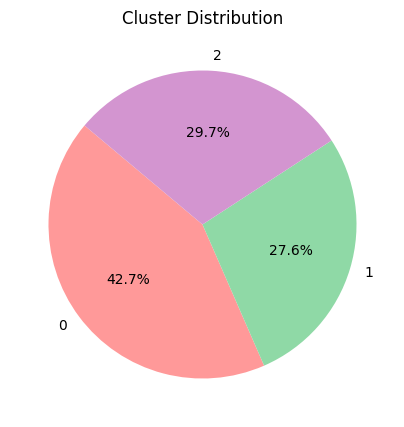

In [159]:
# 2. Count of each cluster
cluster_counts = df_clustered["Cluster"].value_counts().sort_index()

# 3. Define color palette
color_palette_cluster = ['#FF9999', '#8FD9A6', '#D395D0']  # Example for 3 clusters

# 4. Pie Plot
plt.figure(figsize=(5, 5))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=140, colors=color_palette_cluster)

plt.title('Cluster Distribution')
plt.show()

In [160]:
df_pca = pd.DataFrame(
    pipeline[:-1].fit_transform(df),
    columns=pipeline[:-1].get_feature_names_out()
)

df_pca.head()

,pca0,pca1
0,0.251473,0.639851
1,-0.457533,-0.258586
2,0.995434,0.418092
3,-2.893729,1.107103
4,0.946799,2.693657


In [161]:
centroids = pipeline["clustering"].cluster_centers_
centroids

array([[ 1.37236969,  0.04952651],
       [-1.05137991,  1.23737347],
       [-0.98952439, -1.21654083]])

In [213]:
def plot_clusters_2D(dataframe, columns, n_colors, centroids=None, 
                    palette=None, figsize=(10, 6), point_size=80,
                    centroid_marker='X', centroid_size=200):
    """
    Визуализирует 2D кластеры с центроидами
    
    Параметры:
    ----------
    dataframe : pd.DataFrame
        Датафрейм с данными и колонкой 'Cluster'
    columns : list
        Список из двух колонок для осей (например ['pca0', 'pca1'])
    n_colors : int
        Количество кластеров
    centroids : np.array, optional
        Центроиды в формате [[x1,y1], [x2,y2], ...]
    palette : list, optional
        Цветовая палитра (по умолчанию husl)
    figsize : tuple, default=(10,6)
        Размер графика
    point_size : int, default=80
        Размер точек данных
    centroid_marker : str, default='X'
        Маркер для центроидов
    centroid_size : int, default=200
        Размер маркера центроидов
    """
    
    plt.figure(figsize=figsize)
    
    # Проверки
    if 'Cluster' not in dataframe.columns:
        raise ValueError("DataFrame должен содержать колонку 'Cluster'")
    if len(columns) != 2:
        raise ValueError("columns должен содержать ровно 2 названия колонок")
    
    # Визуализация кластеров
    sns.scatterplot(
        data=dataframe,
        x=columns[0],
        y=columns[1],
        hue='Cluster',
        palette=palette if palette else sns.color_palette('husl', n_colors),
        s=point_size,
        alpha=0.7,
        edgecolor='w',
        linewidth=0.5
    )
    
    # Визуализация центроидов
    if centroids is not None:
        plt.scatter(
            centroids[:, 0],
            centroids[:, 1],
            marker=centroid_marker,
            s=centroid_size,
            c='black',
            label='Centroids',
            edgecolors='red',
            linewidths=1.5,
            zorder=3
        )
    
    # Настройки графика
    plt.title('2D Визуализация кластеров с центроидами', pad=20)
    plt.xlabel(columns[0])
    plt.ylabel(columns[1])
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

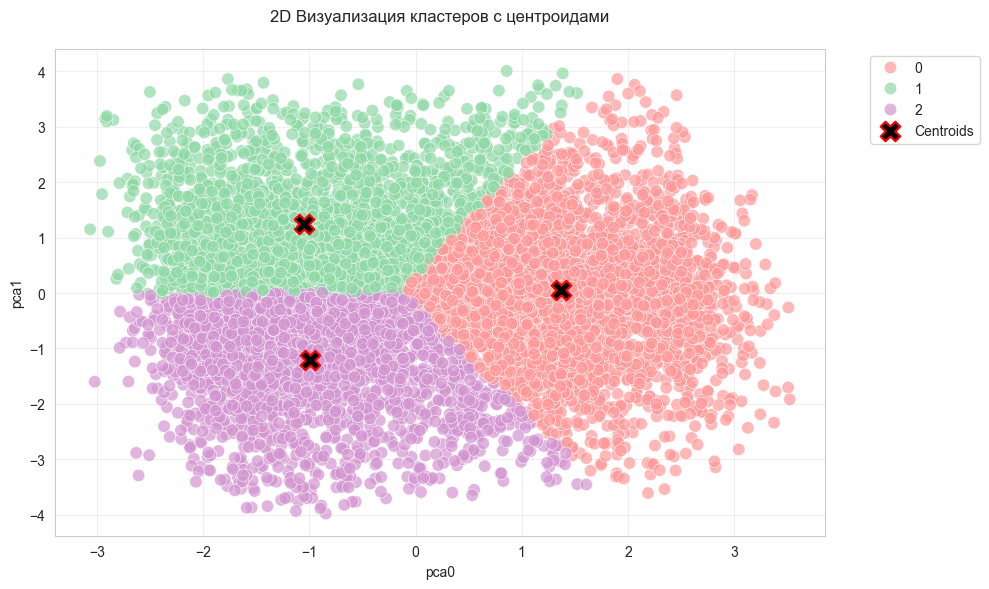

In [ ]:
df_pca = pd.DataFrame(
    pipeline[:-1].transform(df),
    columns=pipeline[:-1].get_feature_names_out()  # Получаем имена колонок автоматически
)
df_pca['Cluster'] = pipeline["clustering"].labels_
centroids = pipeline["clustering"].cluster_centers_

# Вызов функции
plot_clusters_2D(
    dataframe=df_pca,
    columns=df_pca.columns[:2],  # Первые две PCA компоненты
    n_colors=3,
    centroids=centroids,
    palette=['#FF9999', '#8FD9A6', '#D395D0']  # Ваши цвета
)

# 10. КЛАСТЕРНЫЙ АНАЛИЗ

Я выберу основные числовые столбцы, и они будут построены вместе с помощью парных диаграмм и диаграмм ящиков.

In [215]:
# Defining columns for analysis
columns_analysis = [
    "Customer_Age",
    "Months_on_book",
    "Total_Trans_Amt",
    "Credit_Limit",
    "Avg_Utilization_Ratio",
    "Total_Revolving_Bal"
]

In [221]:
def pairplot(dataframe, columns, cluster_column="Cluster", palette=None, figsize=(12, 8)):
    """
    Строит матрицу попарных графиков (pair plot) с раскраской по кластерам
    
    Параметры:
    ----------
    dataframe : pd.DataFrame
        Исходный DataFrame с данными
    columns : list
        Список колонок для анализа
    cluster_column : str, default="Cluster"
        Название колонки с метками кластеров
    palette : list, optional
        Цветовая палитра для кластеров
    figsize : tuple, default=(12, 8)
        Размер матрицы графиков
    """
    # Проверка наличия колонки с кластерами
    if cluster_column not in dataframe.columns:
        raise ValueError(f"Колонка '{cluster_column}' не найдена в DataFrame")
    
    # Проверка наличия указанных колонок
    missing_cols = [col for col in columns if col not in dataframe.columns]
    if missing_cols:
        raise ValueError(f"Колонки не найдены: {missing_cols}")
    
    # Фильтруем только нужные колонки + кластеры
    plot_data = dataframe[columns + [cluster_column]]
    
    # Создаем PairGrid
    g = sns.PairGrid(plot_data, hue=cluster_column, palette=palette, height=figsize[0]/len(columns))
    g.map_upper(sns.scatterplot, alpha=0.7, s=50, edgecolor='w', linewidth=0.5)
    g.map_lower(sns.kdeplot, fill=True, alpha=0.3, warn_singular=False)
    g.map_diag(sns.histplot, kde=True, alpha=0.7, element="step")
    
    # Добавляем легенду
    g.add_legend(title='Cluster')
    g.fig.set_size_inches(figsize)
    
    # Настройка заголовка
    plt.subplots_adjust(top=0.95)
    g.fig.suptitle('Pair Plot с раскраской по кластерам', fontsize=14)
    
    plt.show()

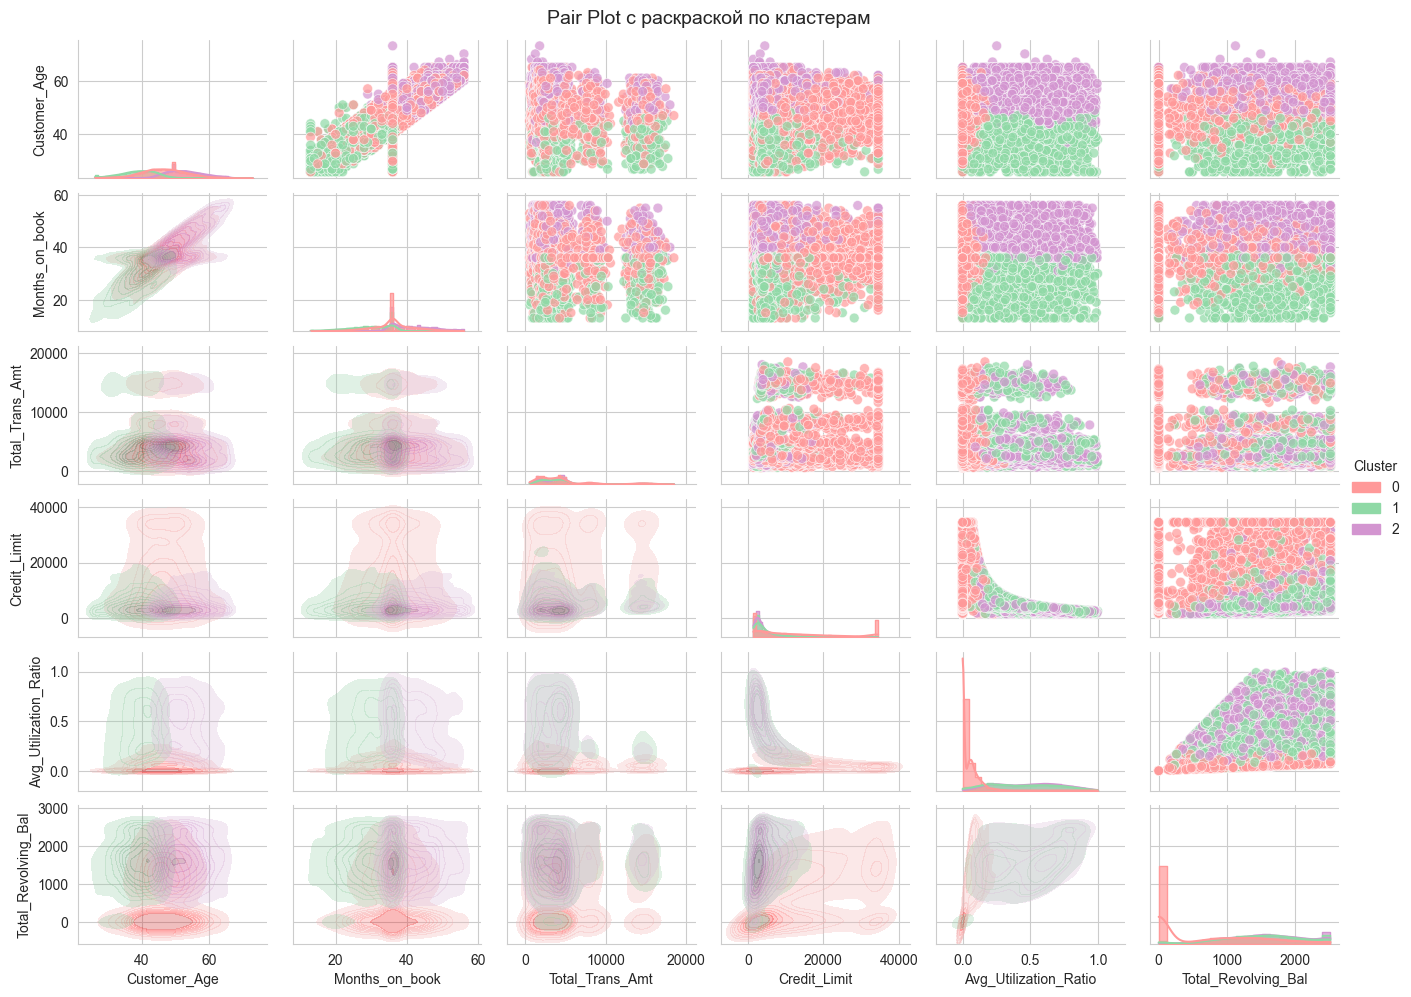

In [224]:
# Вызываем функцию
pairplot(
    dataframe=df_clustered,
    columns=columns_analysis,
    cluster_column="Cluster",
    palette=['#FF9999', '#8FD9A6', '#D395D0'],  # Ваша палитра
    figsize=(14, 10)
)

1. Общие наблюдения:

* Pair plot: Каждая ячейка на графике показывает взаимосвязь между двумя признаками. Диагональные ячейки содержат гистограммы, показывающие распределение отдельных признаков. Недиагональные ячейки содержат диаграммы рассеяния, показывающие взаимосвязь между двумя признаками.
* Раскраска по кластерам: Цвет каждой точки на диаграмме рассеяния соответствует кластеру, к которому принадлежит клиент. Это позволяет увидеть, как кластеры распределены в пространстве признаков.
2. Конкретные наблюдения (примеры):

* Customer_Age vs Months_on_book: На графике видно, что существует положительная корреляция между возрастом клиента и количеством месяцев, в течение которых он является клиентом банка. Также можно увидеть, что кластеры распределены в зависимости от этих параметров.
* Total_Trans_Amt vs Credit_Limit: Видна четкая зависимость с достаточно большим кол-вом выбросов.
* Avg_Utilization_Ratio vs Total_Revolving_Bal: Видно, что большинство клиентов используют кредитный лимит на небольшую часть, а количество тех, кто использует большой кредитный лимит, намного меньше.
3. Интерпретация:

* Разделение кластеров: По некоторым парам признаков видно четкое разделение кластеров, что говорит о том, что эти признаки важны для различения клиентов. По другим парам признаков разделение менее четкое, что говорит о меньшей важности этих признаков.
* Общие закономерности: Pair plot позволяет увидеть общие закономерности в данных, такие как корреляции между признаками и распределение признаков.

C:\Users\user\AppData\Local\Temp\ipykernel_13012\1777994548.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster", y=col, data=df_clustered, ax=ax, showmeans=True, palette=color_palette_cluster)
C:\Users\user\AppData\Local\Temp\ipykernel_13012\1777994548.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster", y=col, data=df_clustered, ax=ax, showmeans=True, palette=color_palette_cluster)
C:\Users\user\AppData\Local\Temp\ipykernel_13012\1777994548.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster", y=col, data=

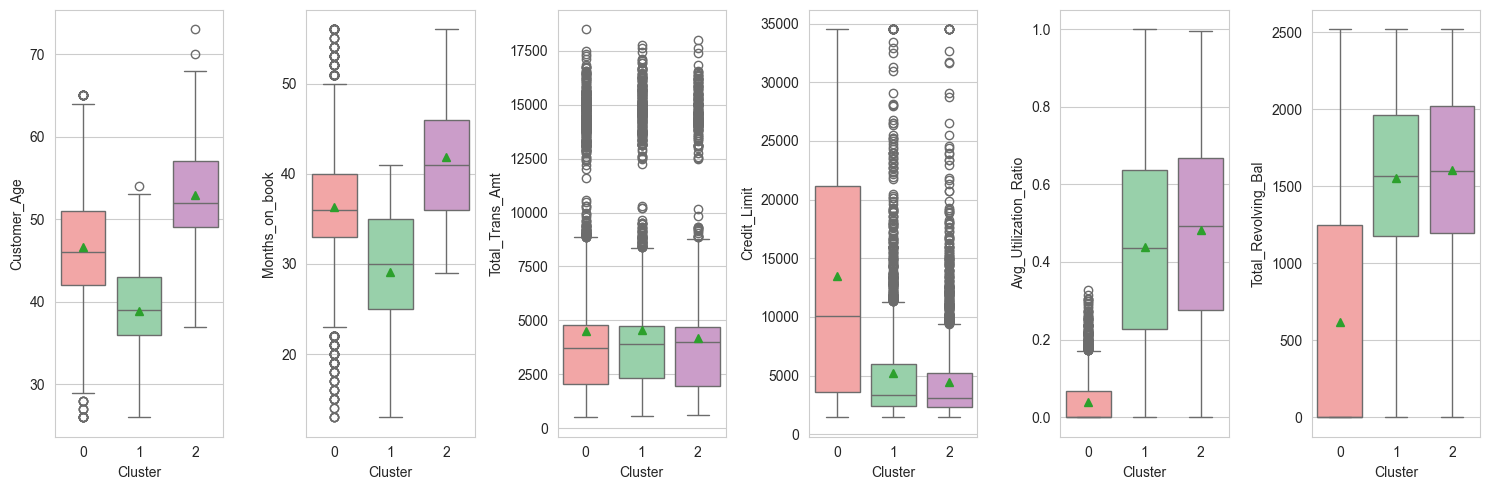

In [225]:
#Box plot of the analyzed columns
fig, axs = plt.subplots(nrows=1, ncols=6, figsize=(15, 5), tight_layout=True)

for ax, col in zip(axs, columns_analysis):
    sns.boxplot(x="Cluster", y=col, data=df_clustered, ax=ax, showmeans=True, palette=color_palette_cluster)

Общие выводы:

* Кластер 0: Клиенты с высокими кредитными лимитами и наибольшим количеством транзакций, но с низкой степенью использования кредита и вращающимся балансом. Возможно, это клиенты, которые часто пользуются картой, но полностью погашают задолженность.

* Кластер 1: Клиенты с более низким возрастом и сроком обслуживания, но с более высокой степенью использования кредита. Это могут быть молодые клиенты, которые активно используют кредитные карты.

* Кластер 2: Клиенты старшего возраста, которые дольше сотрудничают с банком, также с высокой степенью использования кредита.

## Категориальные столбцы

Income_Category

In [226]:
def plot_columns_percent_by_cluster(dataframe, columns, rows_cols=(1, 1), 
                                   figsize=(10, 6), palette=None, order=None):
    """
    Строит процентное распределение категориальных признаков по кластерам
    
    Параметры:
    ----------
    dataframe : pd.DataFrame
        DataFrame с данными и колонкой 'Cluster'
    columns : list
        Список категориальных колонок для анализа
    rows_cols : tuple, default=(1, 1)
        Количество строк и столбцов в grid plot
    figsize : tuple, default=(10, 6)
        Размер фигуры
    palette : list, optional
        Цветовая палитра
    order : list, optional
        Порядок отображения категорий
    """
    
    # Проверка наличия колонки Cluster
    if 'Cluster' not in dataframe.columns:
        raise ValueError("DataFrame должен содержать колонку 'Cluster'")
    
    # Создаем фигуру
    fig, axes = plt.subplots(rows_cols[0], rows_cols[1], figsize=figsize)
    axes = np.array(axes).flatten()  # Для единообразия обработки
    
    for i, col in enumerate(columns[:len(axes)]):
        # Рассчитываем проценты
        cross_tab = pd.crosstab(dataframe[col], dataframe['Cluster'], normalize='index') * 100
        
        # Переупорядочиваем если нужно
        if order:
            cross_tab = cross_tab.reindex(order)
        
        # Строим stacked bar plot
        cross_tab.plot.bar(
            ax=axes[i],
            stacked=True,
            color=palette if palette else None,
            edgecolor='white',
            linewidth=0.5,
            width=0.85
        )
        
        # Настройки графика
        axes[i].set_title(f'Распределение {col} по кластерам')
        axes[i].set_ylabel('Процентное соотношение (%)')
        axes[i].legend(title='Cluster', bbox_to_anchor=(1.05, 1))
        axes[i].grid(axis='y', alpha=0.3)
        
        # Добавляем подписи значений
        for p in axes[i].patches:
            width, height = p.get_width(), p.get_height()
            if height > 5:  # Подписываем только значимые значения
                x, y = p.get_xy()
                axes[i].annotate(
                    f'{height:.1f}%', 
                    (x + width/2, y + height/2), 
                    ha='center', 
                    va='center',
                    fontsize=8
                )
    
    plt.tight_layout()
    plt.show()

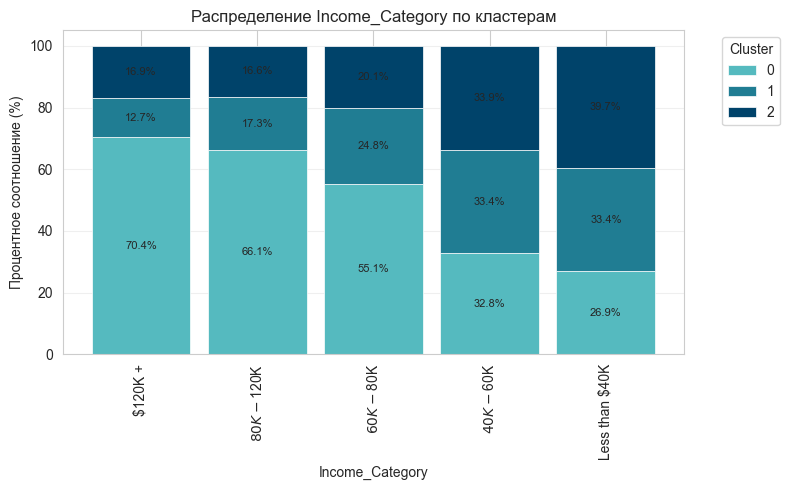

In [227]:
# Определяем порядок категорий
order = ["Less than $40K", "$40K - $60K", "$60K - $80K", "$80K - $120K", "$120K +"][::-1]

# Вызываем функцию
plot_columns_percent_by_cluster(
    dataframe=df_clustered,
    columns=["Income_Category"],
    rows_cols=(1, 1),
    figsize=(8, 5),
    palette=['#55babf', '#207d93', '#00436a', '#001a43', '#010020'],
    order=order
)

Конкретные наблюдения:

* $120K +: В кластере 0 самая большая доля клиентов с высоким доходом (70.4%).
* Less than $40K: Самая большая доля клиентов с низким доходом в кластере 2.
* Все кластеры: Во всех кластерах большая часть клиентов имеет доход выше 60к$.